# Diferenciación automática (o algorítmica): Parte 1

### NOTA

Este notebook se iniciará en la clase y **debe** hacerse en equipo de dos personas (máximo tres). La resolución completa de los ejercicios debe ser enviada como "Tarea4.ipynb".

## Motivación

En el [notebook anterior](https://github.com/lbenet/2016-2_TSFisicaComputacional/blob/master/notas_clase/06_Derivacion_numerica.ipynb), vimos que hay diferentes formas de implementar la derivación de una función $f(x)$ en un punto $x_0$ y que éstas dependen de un parámetro $h$, que es la separación entre puntos cercanos. 

Vimos que el error absoluto en términos de $h$, cuando $h\to 0$, tiene un comportamiento distinto, y que de hecho puede ser "contaminado" por errores de numéricos.

Se obtuvo que:

- La "derivada derecha" converge *linealmente* al $h\to 0$ al valor correcto de la derivada, es decir, el error es proporcional a $\mathcal{O}(h)$. Sin embargo, para valores *suficientemente* pequeños de $h$, el valor obtenido de la derivada deja de tener sentido ya que pierde exactitud.

- La "derivada simétrica" converge *cuadráticamente*, es decir, el error escala como $\mathcal{O}(h^2)$. Al igual que la derivada derecha, para $h$ suficientemente pequeña errores "de cancelación" debidos a la diferencia en la definición hacen que el resultado pierda sentido.

- La definición de la "derivada compleja" también converge *cuadráticamente*; a diferencia de las dos definiciones anteriores *no* exhibe problemas al considerar valores de $h$ muy pequeños.

Los puntos anteriores muestran que, la manera de implementar un algoritmo (concreto) cualquiera en la computadora es importante respecto a cuestiones de la convergencia y del manejo de errores numéricos. En este sentido, la "derivada compleja" da el resultado que más se acerca al exacto, incluso para valores de $h \sim 10.^{-16}$.

La pregunta es si podemos ir más allá y obtener el valor exacto, esto es, el que más se acerca al valor obtenido con números reales excepto por cuestiones de redondeo.

## Diferenciación automática (o algorítmica)

Citando a [wikipedia](https://en.wikipedia.org/wiki/Automatic_differentiation): ``Automatic differentiation (AD), also called algorithmic differentiation or computational differentiation, is a set of techniques to numerically evaluate the derivative of a function specified by a computer program.''

Diferenciación automática **no es** diferenciación numérica. Está basada en cálculos numéricos (evaluación de funciones por la computadora), pero **no** usa ninguna de las definiciones por diferencias finitas, como las que vimos la clase anterior.

Para ilustrar su funcionamiento, empezaremos recordando cómo funcionan los números complejos: $z = a + \mathrm{i} b$.

Uno puede definir todas las operaciones aritméticas de la manera natural (a partir de los números reales), manteniendo las expresiones con $\mathrm{i}$ factorizada; en el caso de la multiplicación y división, simplemente recordamos que $\mathrm{i}^2=-1$.

Por ejemplo, tenemos que, para $z = a + \mathrm{i} b$ y $w = c + \mathrm{i} d$
\begin{eqnarray*}
z + w & = & (a + \mathrm{i} b) + (c + \mathrm{i} d) = a + c + \mathrm{i}(b + d),\\
z \cdot w & = & (a + \mathrm{i} b)\cdot (c + \mathrm{i} d) \\
  & = & ac + \mathrm{i} (ad+bc) + \mathrm{i}^2 b d
 = ac - b d + \mathrm{i} (ad+bc).
\end{eqnarray*}

Por último, vale también la pena recordar que, $\mathbb{C}$ es *isomorfo* a $\mathbb{R}^2$, esto es, hay un mapeo biyectivo de $ z \leftrightarrow (a, b)$.

Volviendo a la cuestión de la diferenciación automática, la idea es introducir un par ordenado donde la primer
componente es el valor de una función $f(x)$ evaluada en $x_0$, y la segunda es el valor de su derivada evaluada
en el mismo punto. Esto es, definimos a los *duales* como:

\begin{equation}
\vec{f}(x_0) = \big( f_0, f'_0\big) = f_0 + \hat{\mathbf{x}}\, f'_0,
\end{equation}

donde $f_0 = f(x_0)$ y $f'_0=\frac{d f}{d x}(x_0)$ y, en la segunda igualdad, $\hat{\mathbf{x}}$ sirve para indicar la segunda componente del par ordenado. (En un sentido que se precisará más adelante, $\hat{\mathbf{x}}$ se comporta de una manera semejante a $\mathrm{i}$ para los números complejos, distinguiéndose en $\hat{\mathbf{x}}^2$.)

En particular, para la función constante $f(x)=c$ se cumple que el dual asociado es $\vec{c}(x_0)=(c,0)$, y para la función identidad $f(x)=x$ obtenemos $\vec{x}(x_0)=(x_0,1)$. Vale la pena aquí enfatizar que la función identidad es precisamente la variable independiente, respecto a la que se está derivando.

### Ejercicio

Implementen una nueva estructura paramétrica (`type`) que defina los duales, donde el parámetro debe ser un subtipo de `Real` (ver la siguiente celda). La parte que identifica a $f_0$ será llamada `fun`, y la correspondiente a $f'_0$ será `der`.

La definición debe incluir métodos que sean compatibles con las dos propiedades arriba mencionadas, es decir, que el dual de una constante (cualquier número real) sea $(c,0)$, y que el de la variable independiente sea $(x_0,1)$. Para lo segundo definiremos una función `xdual` con la propiedad mencionada.

In [5]:
"""Definición de los duales, donde
...
"""
type Dual{D <: Real}
    fun::D
    der::D
    # código: 
end

In [6]:
# Definan un método que permita la promoción automática de las componentes, cuando no son del mismo tipo
Dual(a,b)=Dual(promote(a,b)...)

Dual{D<:Real}

In [7]:
# Aqui se define un método que garantiza que el dual de un número cumple lo requerido
Dual(a)=Dual(a,0)

Dual{D<:Real}

In [8]:
Dual(3)

Dual{Int64}(3,0)

In [9]:
# Aqui se define la función `xdual`, que se usará para identificar la variable independiente
function xdual(x)
    if typeof(x) <: Real
        fun=x
        der=1
        return Dual(fun,der)
    end   
end

xdual (generic function with 1 method)

In [57]:
xdual(-5)

Dual{Int64}(-5,1)

In [11]:
# Muestren que su código funciona con tests adecuados; para los detalles ver 
# http://julia.readthedocs.org/en/release-0.4/stdlib/test/
using Base.Test

# Aqui vienen varios tests de cada una de las funciones que implementaron
@test # falta completar esto

LoadError: LoadError: wrong number of arguments
while loading In[11], in expression starting on line 6

## Aritmética de duales

De la definición, y recordando el significado de cada una de las componentes del par doble, tenemos que las operaciones aritméticas quedan definidas por:

\begin{eqnarray}
    \vec{u} \pm \vec{w} &=& \big( u_0 \pm w_0,\, u'_0\pm w'_0 \big),\\
    \vec{u} \times \vec{w} &=& \big( u_0 \cdot w_0,\, u_0 w'_0 +  w_0 u'_0 \big),\\
    \frac{\vec{u}}{\vec{w}} &=& \big( \frac{u_0}{w_0},\, \frac{ u'_0 - (u_0/w_0)w'_0}{w_0}\big),\\
    {\vec{u}}^\alpha &=& \big( u_0^\alpha,\, \alpha u_0^{\alpha-1} u'_0 \big).\\
\end{eqnarray}    

Además, están los operadores unitarios, que satisfacen:
\begin{equation}
    \pm \vec{u} = \big(\pm u_0, \pm u'_0 \big).
\end{equation}    


### Ejercicio

Implementen *todas* las operaciones aritméticas. Incluyan tests que muestren que cada una de ellas está bien definida, y que sus resultados dan valores consistentes.

In [12]:
import Base: +, -, *, /, ^

# Aqui se implementan los métodos necesarios para cada función
for fn1 = (:+, :-)
    println(fn1)
    ex = quote
        function ($fn1)(a::Dual, b::Dual)
            xx = ($fn1)(a.fun, b.fun)
            yy = ($fn1)(a.der, b.der)
            return Dual(xx, yy)
        end
    end
    println(ex)
    @eval $ex
end

for fn2 in (:*,), fn3 in (:+,)
    println(fn2)
    ex = quote
        function ($fn2)(a::Dual, b::Dual)
            xx = ($fn2)(a.fun, b.fun)
            yy = ($fn3)(($fn2)(a.fun, b.der),($fn2)(a.der, b.fun))
            return Dual(xx, yy)
        end
    end
    println(ex)
    @eval $ex
end


for fn4 = (:/,), fn5 = (:*,), fn6 = (:-,)
    println(fn4)
    ex = quote
        function ($fn4)(a::Dual, b::Dual)
            xx = ($fn4)(a.fun, b.fun)
            yy = ($fn4)(($fn6)(a.der, ($fn5)(($fn4)(a.fun,b.fun),b.der)),b.fun)
            return Dual(xx, yy)
        end
    end
    println(ex)
    @eval $ex
end

for fn7 = (:^,), fn8 = (:*,)
    println(fn7)
    ex = quote
        function ($fn7)(a::Dual, b::Float64)
            xx = ($fn7)(a.fun, b)
            yy = ($fn8)(b,($fn7)(a.fun,b-1),a.der)
            return Dual(xx, yy)
        end
    end
    println(ex)
    @eval $ex
end

for fn9 = (:+, :-)
    println(fn9)
    ex = quote
        function ($fn9)(a::Dual)
            xx = ($fn9)(a.fun)
            yy = ($fn9)(a.der)
            return Dual(xx, yy)
        end
    end
    println(ex)
    @eval $ex
end

+
begin  # In[12], line 7:
    function +(a::Dual,b::Dual) # In[12], line 8:
        xx = a.fun + b.fun # In[12], line 9:
        yy = a.der + b.der # In[12], line 10:
        return Dual(xx,yy)
    end
end
-
begin  # In[12], line 7:
    function -(a::Dual,b::Dual) # In[12], line 8:
        xx = a.fun - b.fun # In[12], line 9:
        yy = a.der - b.der # In[12], line 10:
        return Dual(xx,yy)
    end
end
*
begin  # In[12], line 20:
    function *(a::Dual,b::Dual) # In[12], line 21:
        xx = a.fun * b.fun # In[12], line 22:
        yy = a.fun * b.der + a.der * b.fun # In[12], line 23:
        return Dual(xx,yy)
    end
end
/
begin  # In[12], line 34:
    function /(a::Dual,b::Dual) # In[12], line 35:
        xx = a.fun / b.fun # In[12], line 36:
        yy = (a.der - (a.fun / b.fun) * b.der) / b.fun # In[12], line 37:
        return Dual(xx,yy)
    end
end
^
begin  # In[12], line 47:
    function ^(a::Dual,b::Float64) # In[12], line 48:
        xx = a.fun ^ b # In[12], line 49

In [118]:
#Aqui definimos lo que hace falta para la multiplicación y division de un número con un dual, y la suma y resta 
#con numeros reales.
function *(a::Real,b::Dual)
    Dual(a)*b
end

function *(a::Dual,b::Real)
    return b*a
end

#Para la suma y la resta, al derivar una constante esta se hace cero por lo que la segunda entrada no debe cambiar.
function +(a::Real,b::Dual)
    Dual(a)+b
end

function +(a::Dual,b::Real)
    return b+a
end

function -(a::Real,b::Dual)
    Dual(a)-b
end

function -(a::Dual,b::Real)
    return a-Dual(b)
end

#La división
function /(a::Dual,b::Real)
    a/Dual(b)
end

function /(a::Real,b::Dual)
    Dual(a)/b
end
    

/ (generic function with 51 methods)

In [119]:
# Aqui se incluyen las pruebas necesarias
Dual(3.0,3)-Dual(2,0.5)

Dual{Float64}(1.0,2.5)

In [120]:
Dual(1,3)*Dual(2,5)

Dual{Int64}(2,11)

In [121]:
Dual(2,1)/Dual(4,2)

Dual{Float64}(0.5,0.0)

In [122]:
Dual(2,3)^2

Dual{Int64}(4,12)

In [123]:
Dual(3,-4)

Dual{Int64}(3,-4)

In [124]:
Dual(3,2)+1

Dual{Int64}(4,2)

In [125]:
1+Dual(3,2)

Dual{Int64}(4,2)

Ahora probaremos la infraestructura que han desarrollado hasta ahora. En particular, usaremos la misma función que se
utilizón en la clase anterior:

\begin{equation}
    f_\textrm{test}(x) = 3x^3 - 2,
\end{equation}

y la idea es calcular la derivada en $x_0=1$.

In [126]:
f_test(x) = 3*x^3 - 2

f_test (generic function with 1 method)

In [127]:
f_test(xdual(1))

Dual{Int64}(1,9)

In [128]:
# Del resultado anterior, obtengan el valor de la derivada

Consideremos otra función racional:

$$
g_\textrm{test}(x) = (3x^2-8x+5)/(7x^3-1)
$$

cuya derivada queremos calcular en $x_0=1$. Según [WolframAlpha](http://www.wolframalpha.com/input/?i=D%5B+%283x%5E2-8x%2B5%29%2F%287x%5E3-1%29+%2C+x+%5D+%2F.+x-%3E+1), el resultado exacto es $-1/3$.


In [129]:
gtest(x) = (3x^2-8x+5)/(7x^3-1)

gtest (generic function with 1 method)

In [130]:
gtest( xdual(1) )

Dual{Float64}(0.0,-0.3333333333333333)

El resultado anterior es la representación en números de punto flotante de $-1/3$. La pregunta es si podemos obtener
el resultado exacto.

In [131]:
# Evalúen `gtest` de manera que el resultado sea el exacto



Para entender cómo funciona esto, evaluaremos explícitamente y paso a paso $g_\textrm{test}(x)$ en $\vec{x_0} = (1,1)$:

\begin{equation}
\vec{g_\textrm{test}}(\vec{x}) = \frac{\vec{3}\cdot{\vec{x}}^2-\vec{8}\cdot\vec{x}+\vec{5}}{\vec{7}\cdot{\vec{x}}^3-\vec{1}}
\end{equation}


\begin{eqnarray}
\vec{g_\textrm{test}}(\vec{x}) & = & 
\frac{(3,0)\cdot{(1,1)}^2-(8,0)\cdot(1,1)+(5,0)}{(7,0)\cdot{(1,1)}^3-(1,0)}\\
& = & \frac{(3,0)\cdot(1,2)-(8,0)\cdot(1,1)+(5,0)}{(7,0)\cdot(1,3)-(1,0)}
\end{eqnarray}


\begin{equation}
\vec{g_\textrm{test}}(\vec{x}) = 
\frac{ (3,6)-(8,1)+(5,0)}{(7,21)-(1,0)} = \frac{ \Big(3-8+5, 6-8\Big)}{\Big( 7-1,21\Big)} = 
\frac{ \Big(0, -2\Big)}{\Big( 6,21\Big)} 
\end{equation}

\begin{equation}
\vec{g_\textrm{test}}(\vec{x}) = \Big(\frac{0}{6}, \frac{(-2)-21\cdot(0/6)}{6} \Big) = 
\Big(0, -\frac{1}{3}\Big). \Box
\end{equation}


## Modulos y "runtests.jl" en julia

### Ejercicio

Para reutilizar el código que han hecho en este notebook, y de hecho seguirlo desarrollando, conviene ponerlo dentro de un módulo. Para hacer esto, deberán copiar todo el código necesario (y que aparece en la resolución de los ejercicios anteriores) en un archivo coyo nombre será "AutomDiff.jl" y cuya estructura es:

```julia
# Aqui viene una explicación de lo que se hace en el módulo, los autores y la fecha

# La siguiente instrucción sirve para *precompilar* el módulo
__precompile__(true)

module AD
    import Base: +, -, *, /, ^
    
    export Dual, xdual
    
    # Aqui viene TODO el código que implementaron

end
```

Todas las pruebas deberán ser incluídas en un archivo llamado "runtest.jl", y su estructura es:

```julia
# Este archivo incluye los tests del módulo AD

using Base.test
using AD

# A continuación vienen los tests que implementaron y que deben ser suficientemente exhaustivos


```

Estos dos archivos deben incluirlos en el envío de su tarea.

In [132]:
#Aqui trabajaremos en lo que es formalmente la tarea 5, el problema es por no haber definido los modulos con anterioridad.

In [133]:
import Base: exp, log, sin, cos, tan, sinh, cosh, tanh

In [134]:
function exp(a::Dual)
    xx = exp(a.fun)
    yy = exp(a.fun)*a.der
    return Dual(xx,yy)
end

function log(a::Dual)
    xx = log(a.fun)
    yy = a.der/a.fun
    return Dual(xx,yy)
end

function sin(a::Dual)
    xx = sin(a.fun)
    yy = cos(a.fun)*a.der
    return Dual(xx,yy)
end

function cos(a::Dual)
    xx = cos(a.fun)
    yy = -sin(a.fun)*a.der
    return Dual(xx,yy)
end

function tan(a::Dual)
    xx = tan(a.fun)
    yy = sec(a.fun)^2*a.der
    return Dual(xx,yy)
end

function sinh(a::Dual)
    xx = sinh(a.fun)
    yy = cosh(a.fun)*a.der
    return Dual(xx,yy)
end

function cosh(a::Dual)
    xx = cosh(a.fun)
    yy = sinh(a.fun)*a.der
    return Dual(xx,yy)
end

function tanh(a::Dual)
    xx = tanh(a.fun)
    yy = sech(a.fun)^2*a.der
    
    return Dual(xx,yy)
end


tanh (generic function with 14 methods)

In [135]:
exp(f_test(xdual(1)))

Dual{Float64}(2.718281828459045,24.464536456131405)

In [136]:
exp(-1),exp(-1)*9

(0.36787944117144233,3.310914970542981)

In [137]:
log(f_test(xdual(1)))

Dual{Float64}(0.0,9.0)

In [138]:
log(1)

0.0

In [139]:
f_test(xdual(1))

Dual{Int64}(1,9)

In [140]:
cos(f_test(xdual(1)))

Dual{Float64}(0.5403023058681398,-7.573238863271069)

In [141]:
cos(1),-sin(1)*9

(0.5403023058681398,-7.573238863271069)

In [142]:
sin(f_test(xdual(1)))

Dual{Float64}(0.8414709848078965,4.862720752813258)

In [143]:
sin(1),cos(1)*9

(0.8414709848078965,4.862720752813258)

In [144]:
tan(f_test(xdual(1)))

Dual{Float64}(1.5574077246549023,30.82966938733283)

In [145]:
tan(1),sec(1)^2*9

(1.5574077246549023,30.82966938733283)

In [146]:
sinh(f_test(xdual(1)))

Dual{Float64}(1.1752011936438014,13.887725713337193)

In [147]:
sinh(1),cosh(1)*9

(1.1752011936438014,13.887725713337193)

In [148]:
cosh(f_test(xdual(1)))

Dual{Float64}(1.5430806348152437,10.576810742794212)

In [149]:
cosh(1),sinh(1)*9

(1.5430806348152437,10.576810742794212)

In [150]:
tanh(f_test(xdual(1)))

Dual{Float64}(0.7615941559557649,3.7797690745262353)

In [151]:
tanh(1),sech(1)^2*9

(0.7615941559557649,3.7797690745262353)

## Ejercicio

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [152]:
function f(x)
    sin(x^3-2/x^6)
end

function f1(x)
    cos(x^3-2/x^6)*(3*x^2+12/x^7)
end

f1 (generic function with 1 method)

In [158]:
f(xdual(2))

Dual{Float64}(0.9934213368955197,-1.384934905523464)

In [160]:
f(2),f1(2)

(0.9934213368955197,-1.384934905523464)

In [154]:
function h(x)
    x^3-2/x^6
end

h (generic function with 1 method)

In [155]:
h(xdual(1))

Dual{Float64}(-1.0,15.0)

In [156]:
2/Dual(1,-10)

Dual{Float64}(2.0,20.0)

In [164]:
using PyPlot

In [189]:
x = linspace(1,5,10000)
f1ex=similar(x)
f1nu=similar(x)
fex=similar(x)
fnu=similar(x)

for (i,a) in enumerate(x)
    f1ex[i] = f1(a)
    f1nu[i] = f(xdual(a)).der
    fex[i] = f(a)
    fnu[i] = f(xdual(a)).fun
end

In [190]:
f1ex-f1nu

10000-element Array{Float64,1}:
  0.0        
 -1.77636e-15
 -3.55271e-15
 -8.88178e-15
  3.55271e-15
 -5.32907e-15
 -1.77636e-15
  3.55271e-15
  0.0        
  5.32907e-15
  0.0        
 -1.77636e-15
  0.0        
  ⋮          
  8.88178e-13
  8.73968e-13
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
 -7.60281e-13
  0.0        
  0.0        
  6.82121e-13
  0.0        

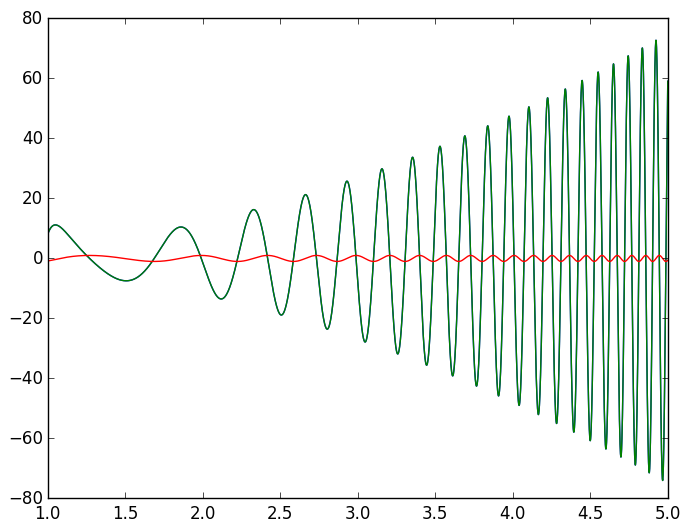

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f20aeec0550>

In [194]:
plot(x,f1ex)
plot(x,f1nu)
plot(x,fnu)

In [206]:
function newton1D(f::Function,x0::Real,n::Int64)
    for i in 1:n
        a = f(xdual(x0))
        x0 = x0 - a.fun/a.der
    end
    return x0
end

newton1D (generic function with 2 methods)

In [207]:
newton1D(x->x^2,0.1,1000)

1.4686492099827628e-162

In [213]:
newton1D(x->x*sin(2x),1.0,1000)

-10.995574287564276

In [223]:
function Wilkinson6(x)
    return (x-6)*(x-5)*(x-4)*(x-3)*(x-2)*(x-1)
end

Wilkinson6 (generic function with 1 method)

In [225]:
Wilkinson6(2.2)

3.6771840000000027

In [229]:
newton1D(x->Wilkinson6(x),2.2,10)

2.0

In [230]:
newton1D(x->Wilkinson6(x),2.45,10)

6.0